In [386]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import sympy as sym
from scipy import integrate
from mpl_toolkits.mplot3d import axes3d
import mpl_toolkits.mplot3d.art3d as art3d
from tqdm import tqdm

In [457]:
def E(phi,x,y,z):
    
    Ex=(x-0.5*np.cos(phi))/(x**2+y**2+z**2+1/4 - x*np.cos(phi) - y*np.sin(phi))**(3/2)
    Ey=(y-0.5*np.cos(phi))/(x**2+y**2+z**2+1/4 - x*np.cos(phi) - y*np.sin(phi))**(3/2)
    Ez=(z)/(x**2+y**2+z**2+1/4 - x*np.cos(phi) - y*np.sin(phi))**(3/2)
    
    Et=[Ex,Ey,Ez]
    
    return Et

In [458]:
G_leg=60

In [459]:
def Integral(x,y,z,n):
    a=0
    b=2*np.pi
    Points, Weights = np.polynomial.legendre.leggauss(n)
    I=np.zeros([3])
    for p in  range(len(Weights)):
        t=(((b-a)*Points[p])+a+b)/2
        Et=E(t,x,y,z)
        I[0]+=(Weights[p]*Et[0])
        I[1]+=(Weights[p]*Et[1])
        I[2]+=(Weights[p]*Et[2])
    I*=0.5*(b-a)*0.5/np.pi
    return I

In [460]:
Integral(0.6,0.6,1,G_leg)

array([0.21152494, 0.21152494, 0.43864732])

In [510]:
N=6
x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)

In [500]:
Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.84it/s]


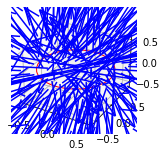

In [514]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121,projection='3d')
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)
ax.set_zlim(-0.6,0.6)
circle=Circle((0,0),0.6,color='r',fill=False)
ax.add_patch(circle)
art3d.pathpatch_2d_to_3d(circle, z=0, zdir="z")

for i in tqdm(range(N)):
    for j in range(N):
        for k in range(N):
            
            Ex[i,j,k]=Integral(x[i],y[j],z[k],G_leg)[0]
            
            Ey[i,j,k]=Integral(x[i],y[j],z[k],G_leg)[1]
            
            Ez[i,j,k]=Integral(x[i],y[j],z[k],G_leg)[2]
            
            
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],Ey[i,j,k],Ez[i,j,k],color='blue')
     
            

In [509]:
print(Ex[:,:,5],Ey[:,:,5])


[[-0.44648528 -0.53804445 -0.57663105 -0.57663105 -0.53804445 -0.44648528]
 [-0.32282667 -0.3577905  -0.34807361 -0.34807361 -0.3577905  -0.32282667]
 [-0.11532621 -0.11602454 -0.1022882  -0.1022882  -0.11602454 -0.11532621]
 [ 0.11532621  0.11602454  0.1022882   0.1022882   0.11602454  0.11532621]
 [ 0.32282667  0.3577905   0.34807361  0.34807361  0.3577905   0.32282667]
 [ 0.44648528  0.53804445  0.57663105  0.57663105  0.53804445  0.44648528]] [[-0.44648528 -0.19815863  0.20278231  0.59248899  0.82149881  0.83539031]
 [-0.66271248 -0.3577905   0.1345449   0.6171634   0.96294997  1.03671659]
 [-0.89473957 -0.59864304 -0.1022882   0.40120967  0.84921248  1.05379383]
 [-1.05379383 -0.84921248 -0.40120967  0.1022882   0.59864304  0.89473957]
 [-1.03671659 -0.96294997 -0.6171634  -0.1345449   0.3577905   0.66271248]
 [-0.83539031 -0.82149881 -0.59248899 -0.20278231  0.19815863  0.44648528]]
